# Lasso Regression (L1 Regularization)

In [1]:
#We will use the breast cancer data for the Lasso Regression problem
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [2]:
#value of features of our data
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
#column names of our data
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
#labels/targets of our data
cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

We need to convert this cancer data into a pandas dataframe

In [5]:
#pd.DataFrame(data, columns = column names)
import pandas as pd
pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
cancer_df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
cancer_df.shape

(569, 30)

In [7]:
#define features and targets/labels
X = cancer_data.data
Y = cancer_data.target

In [8]:
#split our data into train and test data using built-in function
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)

In [9]:
from sklearn.linear_model import Lasso
lasso = Lasso() #default alpha=1, max_iter=1000
lasso.fit(xtrain, ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
#Check scores
print("Train score: ", lasso.score(xtrain, ytrain))
print("Test score: ", lasso.score(xtest, ytest))

Train score:  0.5545175647598592
Test score:  0.5809250913192422


In [11]:
#Check attributes of the model
print("Coefficients: ") 
print(lasso.coef_)
print("Fitted Coefficients: ")
print(lasso.sparse_coef_)
print("Intercept: ")
print(lasso.intercept_)
print("Number of Iterations: ")
print(lasso.n_iter_)

Coefficients: 
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -5.90360376e-05
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  2.20665441e-04 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.80106337e-03 -4.12002563e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
Fitted Coefficients: 
  (0, 3)	-5.9036037620262945e-05
  (0, 13)	0.00022066544067206255
  (0, 22)	-0.002801063373852062
  (0, 23)	-0.00041200256315111875
Intercept: 
1.3189358244577947
Number of Iterations: 
172


We can see that most of the coefficients are 0, which implies that those features are eliminated.

In [12]:
#Define a function to get the non-zero coefficients of our models
def get_non_zero_coefs(coefs):
    non_zero_coef = []
    for coef in coefs:
        if coef != 0:
            non_zero_coef.append(coef)
    return non_zero_coef

In [13]:
#get the non zero coefficients of our model
coefs_1 = get_non_zero_coefs(lasso.coef_)
coefs_1

[-5.9036037620262945e-05,
 0.00022066544067206255,
 -0.002801063373852062,
 -0.00041200256315111875]

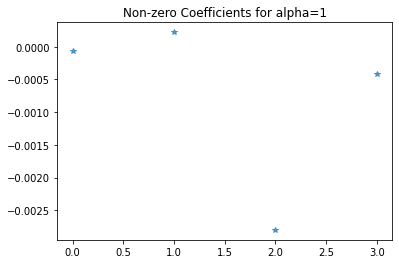

In [14]:
#visulaize the non zero coefficients
import matplotlib.pyplot as plt
plt.plot(coefs_1, alpha=0.7, linestyle='none', marker="*")
plt.title("Non-zero Coefficients for alpha=1")
plt.show()

In [15]:
#Reduce the alpha and increase the number of iterations
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(xtrain,ytrain)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
#Check scores
print("Train score: ", lasso001.score(xtrain, ytrain))
print("Test score: ", lasso001.score(xtest, ytest))

Train score:  0.6850165858331319
Test score:  0.6983878638362515


In [17]:
#print attributes
print("Coefficients: ") 
print(lasso001.coef_)
print("Fitted Coefficients: ")
print(lasso001.sparse_coef_)
print("Intercept: ")
print(lasso001.intercept_)
print("Number of Iterations: ")
print(lasso001.n_iter_)

Coefficients: 
[ 0.          0.00510413 -0.00191472  0.00043672 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.00282526 -0.00125482 -0.         -0.         -0.         -0.
 -0.         -0.         -0.09961885 -0.01807871 -0.00872247  0.00070964
 -0.         -0.         -0.07922343 -0.         -0.         -0.        ]
Fitted Coefficients: 
  (0, 1)	0.0051041277179282914
  (0, 2)	-0.0019147169099287128
  (0, 3)	0.0004367222445305503
  (0, 12)	-0.0028252617191636587
  (0, 13)	-0.0012548240628335158
  (0, 20)	-0.0996188524760875
  (0, 21)	-0.01807871060493656
  (0, 22)	-0.008722467944876144
  (0, 23)	0.0007096416063926723
  (0, 26)	-0.0792234296674087
Intercept: 
2.892298830622056
Number of Iterations: 
803


There are still some coefficients which are zero but more features have been considered compared to the earlier model

In [18]:
#get the non-zero coefficients of our model
coefs_001 = get_non_zero_coefs(lasso001.coef_)
coefs_001

[0.0051041277179282914,
 -0.0019147169099287128,
 0.0004367222445305503,
 -0.0028252617191636587,
 -0.0012548240628335158,
 -0.0996188524760875,
 -0.01807871060493656,
 -0.008722467944876144,
 0.0007096416063926723,
 -0.0792234296674087]

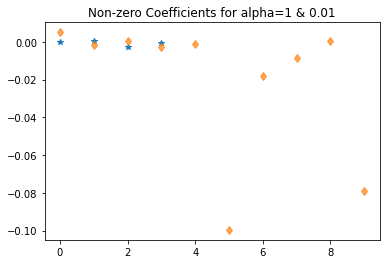

In [19]:
#visualize the comparison of the coefficients of both models
plt.plot(coefs_1, alpha=1, linestyle='none', marker="*")
plt.plot(coefs_001, alpha=0.7, linestyle='none', marker="d")
plt.title("Non-zero Coefficients for alpha=1 & 0.01")
plt.show()

As we decrease the alpha but increase the number of iterations, number of non-zero coefficients (contributing features) increase

In [20]:
#reduce the alpha further
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(xtrain,ytrain)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
#Check scores
print("Train score: ", lasso00001.score(xtrain, ytrain))
print("Test score: ", lasso00001.score(xtest, ytest))

Train score:  0.7632343501379834
Test score:  0.756592146753982


In [22]:
#print attributes
print("Coefficients: ") 
print(lasso00001.coef_)
print("Fitted Coefficients: ")
print(lasso00001.sparse_coef_)
print("Intercept: ")
print(lasso00001.intercept_)
print("Number of Iterations: ")
print(lasso00001.n_iter_)

Coefficients: 
[ 9.35863643e-02 -4.62998411e-03 -1.62544002e-02  4.54940559e-05
  0.00000000e+00  3.06274398e+00 -1.72719889e-01 -2.29200988e+00
 -0.00000000e+00  0.00000000e+00 -7.83572357e-01 -1.45839689e-02
  7.09124977e-03  2.94829876e-03 -0.00000000e+00  0.00000000e+00
  1.18108944e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.18030580e-01 -8.15412791e-03  6.76436418e-03  4.40570282e-04
 -2.13047970e+00 -2.29805372e-01 -4.29433761e-01 -1.47505709e+00
 -4.06443355e-01 -2.92381847e-01]
Fitted Coefficients: 
  (0, 0)	0.09358636429647643
  (0, 1)	-0.004629984110316715
  (0, 2)	-0.016254400245481495
  (0, 3)	4.549405590467964e-05
  (0, 5)	3.0627439784934105
  (0, 6)	-0.17271988879594904
  (0, 7)	-2.2920098842821757
  (0, 10)	-0.7835723566375412
  (0, 11)	-0.014583968912621589
  (0, 12)	0.00709124976905247
  (0, 13)	0.0029482987593544077
  (0, 16)	1.1810894401640804
  (0, 20)	-0.11803057986095566
  (0, 21)	-0.008154127905157911
  (0, 22)	0.006764364184944492
  (0, 23)	0.000440

There are way more non-zero coefficients than the last two models

In [23]:
#get the non-zero coefficients
coefs_00001 = get_non_zero_coefs(lasso00001.coef_)
coefs_00001

[0.09358636429647643,
 -0.004629984110316715,
 -0.016254400245481495,
 4.549405590467964e-05,
 3.0627439784934105,
 -0.17271988879594904,
 -2.2920098842821757,
 -0.7835723566375412,
 -0.014583968912621589,
 0.00709124976905247,
 0.0029482987593544077,
 1.1810894401640804,
 -0.11803057986095566,
 -0.008154127905157911,
 0.006764364184944492,
 0.0004405702820152379,
 -2.1304796981410568,
 -0.2298053716256754,
 -0.4294337613145908,
 -1.475057085896613,
 -0.4064433551116891,
 -0.2923818470571481]

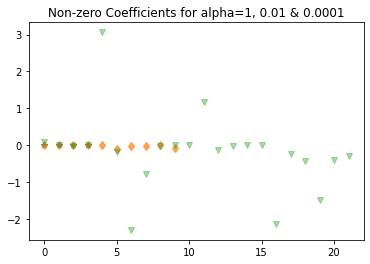

In [24]:
#visualize the comparison of coefficients of the 3 models
plt.plot(coefs_1, alpha=1, linestyle='none', marker="*")
plt.plot(coefs_001, alpha=0.7, linestyle='none', marker="d")
plt.plot(coefs_00001, alpha=0.4, linestyle='none', marker="v")
plt.title("Non-zero Coefficients for alpha=1, 0.01 & 0.0001")
plt.show()

In [25]:
#now let us generate the linear model for the same data
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(xtrain,ytrain)
print("Train score: ",lmodel.score(xtrain,ytrain))
print("Test score: ",lmodel.score(xtest,ytest))

Train score:  0.7781704446592831
Test score:  0.7317018070915914


In [26]:
#print all the train and test scores of the different models generated for comparison
import numpy as np
print(pd.DataFrame(np.array([["Linear Regression",lmodel.score(xtrain,ytrain),lmodel.score(xtest,ytest)],
                      ["Lasso Regression (alpha=1)",lasso.score(xtrain,ytrain),lasso.score(xtest,ytest)],
                      ["Lasso Regression (alpha=0.01)",lasso001.score(xtrain,ytrain),lasso001.score(xtest,ytest)],
                      ["Lasso Regression (alpha=0.0001)",lasso00001.score(xtrain,ytrain),lasso00001.score(xtest,ytest)]]),
            columns=["Model","Train Score", "Test Score"]).to_string(index=False))

                           Model         Train Score          Test Score
               Linear Regression  0.7781704446592831  0.7317018070915914
      Lasso Regression (alpha=1)  0.5545175647598592  0.5809250913192422
   Lasso Regression (alpha=0.01)  0.6850165858331319  0.6983878638362515
 Lasso Regression (alpha=0.0001)  0.7632343501379834   0.756592146753982


This shows the comparison of all the train and test scores for different models

Clearly, we can see the Lasso Regression with alpha=0.0001 has a test score even better than the normal Linear Regression model